In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('IMDB Dataset.csv')

In [3]:
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [4]:
df.tail(10)

,review,sentiment
49990,"Lame, lame, lame!!! A 90-minute cringe-fest th...",negative
49991,"Les Visiteurs, the first movie about the medie...",negative
49992,John Garfield plays a Marine who is blinded by...,positive
49993,Robert Colomb has two full-time jobs. He's kno...,negative
49994,This is your typical junk comedy.<br /><br />T...,negative
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [5]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [7]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [8]:
df.isnull()

,review,sentiment
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
49995,False,False
49996,False,False
49997,False,False
49998,False,False


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mumaiz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mumaiz\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

review       0
sentiment    0
dtype: int64


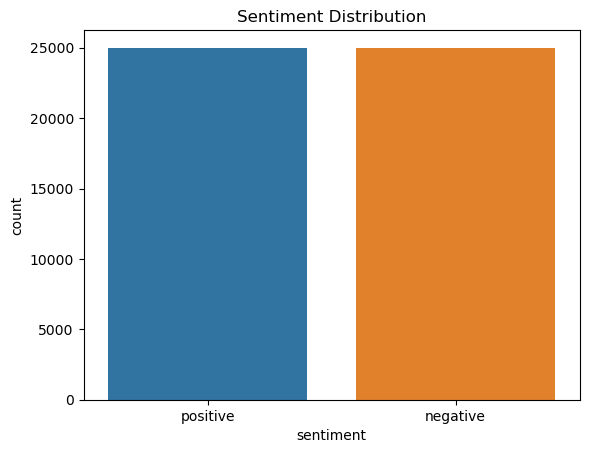

In [10]:
# Load dataset
df = pd.read_csv('IMDB Dataset.csv')

# Display first few rows
df.head()

# Check for missing values
print(df.isnull().sum())

# Review class distribution
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Distribution")
plt.show()

In [11]:
# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Text cleaning function
def preprocess_text(text):
    text = re.sub('<.*?>', '', text)  # Remove HTML tags
    text = re.sub('[^a-zA-Z]', ' ', text)  # Remove non-alphabetic characters
    text = text.lower()  # Lowercase
    text = text.split()  # Tokenization
    text = [lemmatizer.lemmatize(word) for word in text if word not in stop_words]  # Lemmatization and stopword removal
    return ' '.join(text)

# Apply preprocessing
df['review'] = df['review'].apply(preprocess_text)


In [12]:
df

,review,sentiment
0,one reviewer mentioned watching oz episode hoo...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically family little boy jake think zombie ...,negative
4,petter mattei love time money visually stunnin...,positive
...,...,...
49995,thought movie right good job creative original...,positive
49996,bad plot bad dialogue bad acting idiotic direc...,negative
49997,catholic taught parochial elementary school nu...,negative
49998,going disagree previous comment side maltin on...,negative


In [13]:
# Split data into train and test sets
X = df['review']
y = df['sentiment'].map({'positive': 1, 'negative': 0})  # Map sentiments to binary

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [14]:
# Naive Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Prediction and Evaluation
nb_predictions = nb_model.predict(X_test_tfidf)
print("Naive Bayes Model Accuracy:", accuracy_score(y_test, nb_predictions))
print(classification_report(y_test, nb_predictions))


Naive Bayes Model Accuracy: 0.85456
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      6157
           1       0.85      0.86      0.86      6343

    accuracy                           0.85     12500
   macro avg       0.85      0.85      0.85     12500
weighted avg       0.85      0.85      0.85     12500



In [15]:
# Logistic Regression Model
lr_model = LogisticRegression(max_iter=100)
lr_model.fit(X_train_tfidf, y_train)

# Prediction and Evaluation
lr_predictions = lr_model.predict(X_test_tfidf)
print("Logistic Regression Model Accuracy:", accuracy_score(y_test, lr_predictions))
print(classification_report(y_test, lr_predictions))


Logistic Regression Model Accuracy: 0.8896
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      6157
           1       0.88      0.90      0.89      6343

    accuracy                           0.89     12500
   macro avg       0.89      0.89      0.89     12500
weighted avg       0.89      0.89      0.89     12500



In [16]:
# Initialize Linear Support Vector Classifier
svm_model = LinearSVC()

# Train the model
svm_model.fit(X_train_tfidf, y_train)

# Predict on test data
svm_predictions = svm_model.predict(X_test_tfidf)

# Evaluate the model
print("LinearSVC Model Accuracy:", accuracy_score(y_test, svm_predictions))
print(classification_report(y_test, svm_predictions))

LinearSVC Model Accuracy: 0.88184
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      6157
           1       0.88      0.89      0.88      6343

    accuracy                           0.88     12500
   macro avg       0.88      0.88      0.88     12500
weighted avg       0.88      0.88      0.88     12500



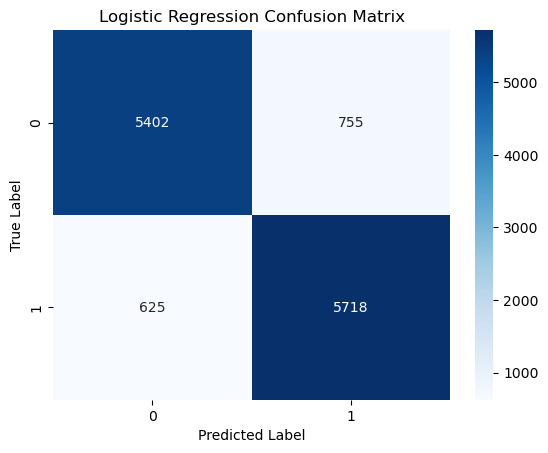

In [17]:
# Confusion Matrix for Logistic Regression
conf_matrix = confusion_matrix(y_test, lr_predictions)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Logistic Regression Confusion Matrix")
plt.show()


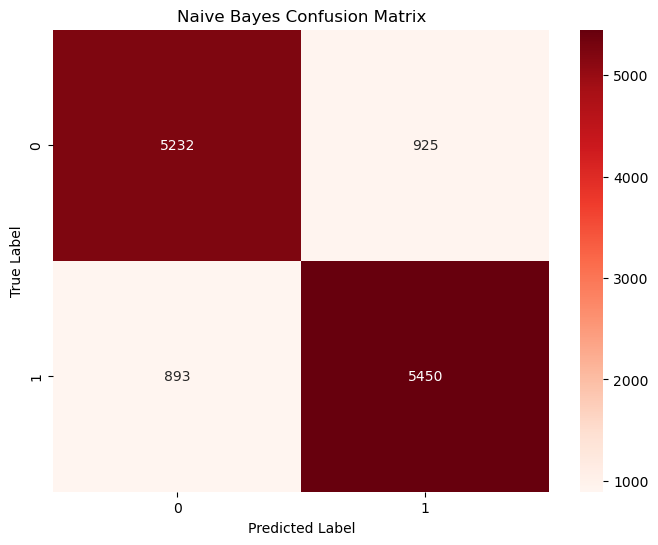

In [18]:
# Naive Bayes Confusion Matrix
nb_conf_matrix = confusion_matrix(y_test, nb_predictions)  # Assuming nb_predictions is the result from Naive Bayes
plt.figure(figsize=(8, 6))
sns.heatmap(nb_conf_matrix, annot=True, fmt="d", cmap="Reds")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Naive Bayes Confusion Matrix")
plt.show()

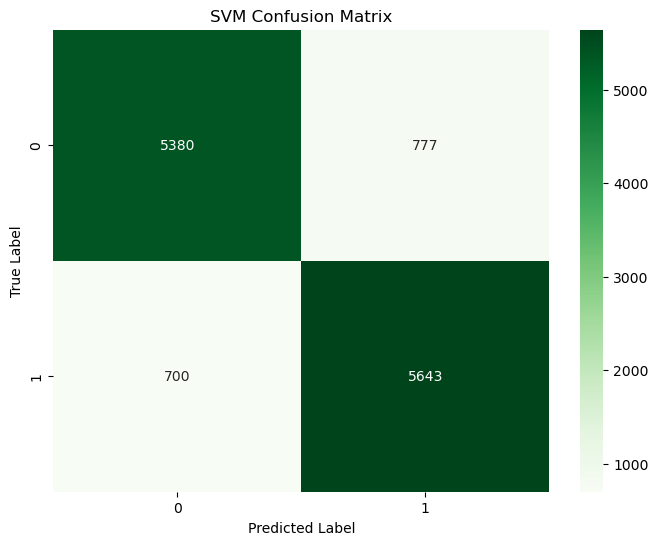

In [19]:
# SVM Confusion Matrix
svm_conf_matrix = confusion_matrix(y_test, svm_predictions)  # Assuming svm_predictions is the result from SVM
plt.figure(figsize=(8, 6))
sns.heatmap(svm_conf_matrix, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("SVM Confusion Matrix")
plt.show()

In [20]:
# Dictionary to store results
model_performance = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

# Define a function to evaluate models
def evaluate_model(name, predictions, y_test):
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, pos_label=1)
    recall = recall_score(y_test, predictions, pos_label=1)
    f1 = f1_score(y_test, predictions, pos_label=1)
    
    # Append to dictionary
    model_performance["Model"].append(name)
    model_performance["Accuracy"].append(accuracy)
    model_performance["Precision"].append(precision)
    model_performance["Recall"].append(recall)
    model_performance["F1-Score"].append(f1)

# Evaluate Naive Bayes
evaluate_model("Naive Bayes", nb_predictions, y_test)

# Evaluate Logistic Regression
evaluate_model("Logistic Regression", lr_predictions, y_test)

# Evaluate SVM
evaluate_model("SVM", svm_predictions, y_test)

# Convert the results dictionary into a DataFrame for better visualization
performance_df = pd.DataFrame(model_performance)

# Display the comparison table
print(performance_df)

                 Model  Accuracy  Precision    Recall  F1-Score
0          Naive Bayes   0.85456   0.854902  0.859215  0.857053
1  Logistic Regression   0.88960   0.883362  0.901466  0.892322
2                  SVM   0.88184   0.878972  0.889642  0.884275


In [21]:
# Assuming you have new data to predict
X_new = ["Henry cavill nailed the role perfectly. The fight scenes, the music, the cinematography, the whole atmosphere is beyond amazing. Netflix did it again"]  # Replace this with your new data (in the same format as X_train)

# Transform new data using the same TF-IDF vectorizer
X_new_tfidf = tfidf_vectorizer.transform(X_new)  # Ensure tfidf_vectorizer is the one used to transform X_train

# Prediction for new data
new_predictions = lr_model.predict(X_new_tfidf)
mapped_predictions = ["positive" if pred == 1 else "negative" for pred in new_predictions]
print("Predictions for new data:", mapped_predictions)

Predictions for new data: ['positive']
